In [1]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from konlpy.tag import Okt

# 워드클라우드
from wordcloud import WordCloud

# 카운트함수
from collections import Counter

In [2]:
df_1=pd.read_csv('./제주여행_유튜브.csv',encoding='utf-8')

In [3]:
df_1['title'][0:]

0                            절대 실패하지 않는 제주도 여행 코스 짜는 방법.
1      제주 서부 추천스팟 70곳 총정리 🌵 관광지 맛집 카페 숙소 책방 소품샵 - 애월 ...
2                      제주도 가을(10월, 11월)에 가면 좋은 여행지  추천해요
3      [vlog] E와I의 가을 제주여행 vlog #1탄🍊ㅣ금오름.정직한돈.풀베개.집의기...
4                      따라만가도 동선 낭비없는 최적의 제주도 동쪽코스! 9곳 추천
                             ...                        
753     Ten mucho cuidado en quien confías en la calle 🥹
754    🔴SOY JESUS👉TUS ORACIONES HAN SIDO ESCUCHADAS, ...
755    제주 여행 마지막날 브이로그 [오는정김밥 황우지해안 선녀탕 스노쿨링 주상절리 용머리...
756    Top_Must Watch New Funny Video 2022 Top New Co...
757               Hidup Gratis Ala Manusia Paling Curang
Name: title, Length: 758, dtype: object

In [4]:
df_1['title']= df_1['title'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df_1['title']=df_1["title"].map(lambda x : (re.sub(' +', ' ', x)))

In [5]:
df_1

,title
0,절대 실패하지 않는 제주도 여행 코스 짜는 방법
1,제주 서부 추천스팟 70곳 총정리 관광지 맛집 카페 숙소 책방 소품샵 애월 한림 한...
2,제주도 가을 10월 11월 에 가면 좋은 여행지 추천해요
3,vlog E와I의 가을 제주여행 vlog 1탄 ㅣ금오름 정직한돈 풀베개 집의기록상...
4,따라만가도 동선 낭비없는 최적의 제주도 동쪽코스 9곳 추천
...,...
753,Ten mucho cuidado en quien confías en la calle
754,SOY JESUS TUS ORACIONES HAN SIDO ESCUCHADAS N...
755,제주 여행 마지막날 브이로그 오는정김밥 황우지해안 선녀탕 스노쿨링 주상절리 용머리해...
756,Top_Must Watch New Funny Video 2022 Top New Co...


In [6]:
df_1['title'].to_csv('./제주여행_split.csv',encoding='utf-8',index=False)

In [7]:
df_1['title'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,절대,실패하지,않는,제주도,여행,코스,짜는,방법,,None,...,None,None,None,None,None,None,None,None,None,None
1,제주,서부,추천스팟,70곳,총정리,관광지,맛집,카페,숙소,책방,...,None,None,None,None,None,None,None,None,None,None
2,제주도,가을,10월,11월,에,가면,좋은,여행지,추천해요,None,...,None,None,None,None,None,None,None,None,None,None
3,,vlog,E와I의,가을,제주여행,vlog,1탄,ㅣ금오름,정직한돈,풀베개,...,None,None,None,None,None,None,None,None,None,None
4,따라만가도,동선,낭비없는,최적의,제주도,동쪽코스,9곳,추천,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,Ten,mucho,cuidado,en,quien,confías,en,la,calle,,...,None,None,None,None,None,None,None,None,None,None
754,,SOY,JESUS,TUS,ORACIONES,HAN,SIDO,ESCUCHADAS,NO,IGNORES,...,None,None,None,None,None,None,None,None,None,None
755,제주,여행,마지막날,브이로그,오는정김밥,황우지해안,선녀탕,스노쿨링,주상절리,용머리해안,...,None,None,None,None,None,None,None,None,None,None
756,Top_Must,Watch,New,Funny,Video,2022,Top,New,Comedy,Video,...,None,None,None,None,None,None,None,None,None,None


In [8]:
# 파일로드
data_1 = pd.read_csv('./제주여행_split.csv',encoding='utf-8')
data_1 = data_1['title']

In [9]:
data_1

0                            절대 실패하지 않는 제주도 여행 코스 짜는 방법 
1      제주 서부 추천스팟 70곳 총정리 관광지 맛집 카페 숙소 책방 소품샵 애월 한림 한...
2                        제주도 가을 10월 11월 에 가면 좋은 여행지 추천해요
3       vlog E와I의 가을 제주여행 vlog 1탄 ㅣ금오름 정직한돈 풀베개 집의기록상...
4                       따라만가도 동선 낭비없는 최적의 제주도 동쪽코스 9곳 추천
                             ...                        
753      Ten mucho cuidado en quien confías en la calle 
754     SOY JESUS TUS ORACIONES HAN SIDO ESCUCHADAS N...
755    제주 여행 마지막날 브이로그 오는정김밥 황우지해안 선녀탕 스노쿨링 주상절리 용머리해...
756    Top_Must Watch New Funny Video 2022 Top New Co...
757               Hidup Gratis Ala Manusia Paling Curang
Name: title, Length: 758, dtype: object

In [10]:
# 데이터가져오기
f = open("./제주여행_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [11]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [12]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [18]:
#많이 나온 단어
korean = pd.Series(final_result).value_counts(ascending=False).head(200)
print('키워드')
print(korean)

키워드
제주        852
여행        812
제주도       282
로그        118
브이        115
         ... 
쇼핑          5
국회          5
위원회         5
협재해수욕장      5
레이스         5
Length: 200, dtype: int64


In [19]:
count_data = korean.to_dict()

In [15]:
count = Counter(count_data)
count

Counter({'제주': 852,
         '여행': 812,
         '제주도': 282,
         '로그': 118,
         '브이': 115,
         '맛집': 104,
         '카페': 84,
         '추천': 79,
         '코스': 63,
         '서귀포': 43,
         '투어': 43,
         '박일': 37,
         '숙소': 37,
         '애월': 34,
         '가족': 32,
         '호텔': 28,
         '혼자': 28,
         '영상': 28,
         '뉴스': 26,
         '우도': 26,
         '패스': 24,
         '친구': 22,
         '가을': 22,
         '서쪽': 22,
         '일상': 22,
         '명소': 21,
         '해수욕장': 21,
         '해변': 21,
         '여행지': 20,
         '함덕': 20,
         '날씨': 19,
         '돼지': 18,
         '동쪽': 18,
         '뚜벅': 18,
         '힐링': 18,
         '여름': 18,
         '바다': 18,
         '스팟': 17,
         '겨울': 17,
         '해안': 16,
         '아기': 16,
         '체험': 15,
         '파크': 15,
         '아이': 15,
         '시작': 15,
         '꿀팁': 15,
         '비행기': 15,
         '도로': 14,
         '감성': 14,
         '공항': 14,
         '국내': 14,
         '먹방': 14,


In [16]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

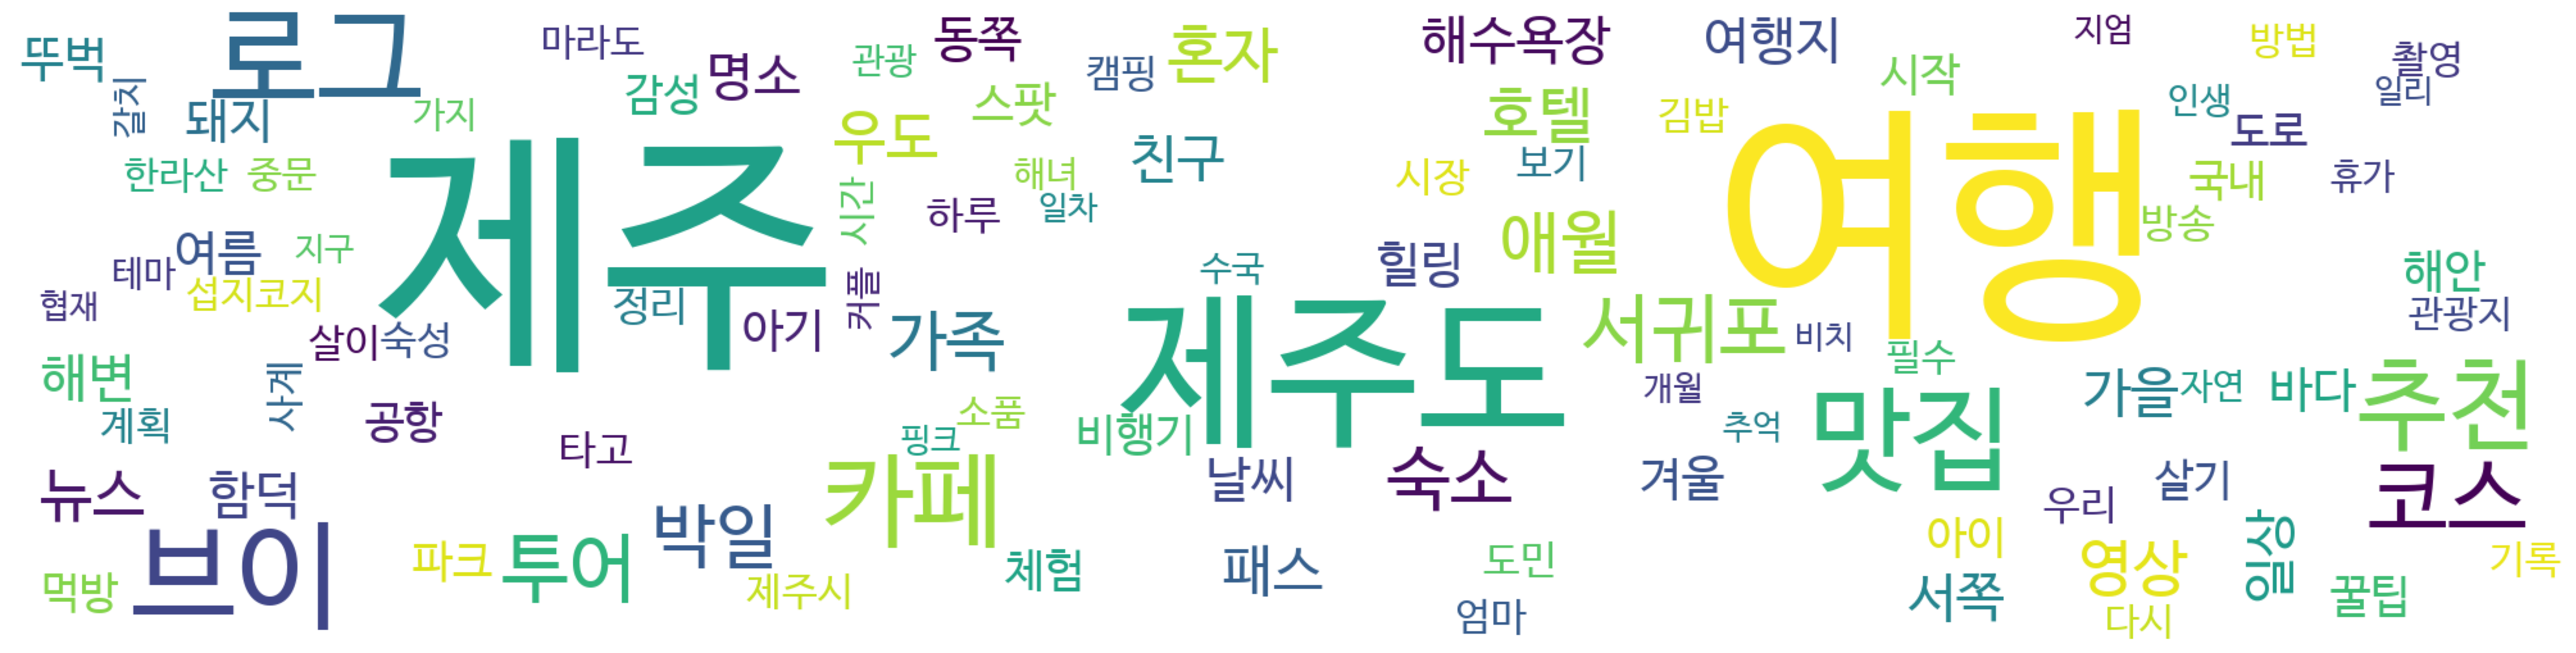

In [20]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()